In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("./train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='Embarked', ylabel='count'>

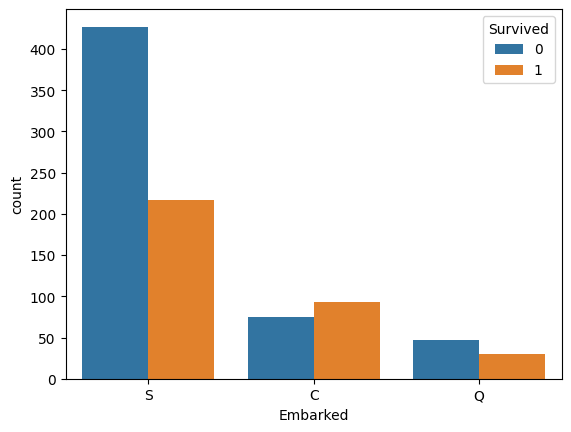

In [5]:
sns.countplot(data=train_data, x = 'Embarked', hue = 'Survived')

In [6]:
# train_data.describe()
train_data.info()
train_data['Embarked'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
train_data["SibSp"] = train_data["SibSp"] + train_data["Parch"]
train_data = train_data.drop(["PassengerId", "Name", "Ticket", "Cabin", "Parch"], axis=1)
train_data

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,NaN,3,23.4500,S
889,1,1,male,26.0,0,30.0000,C


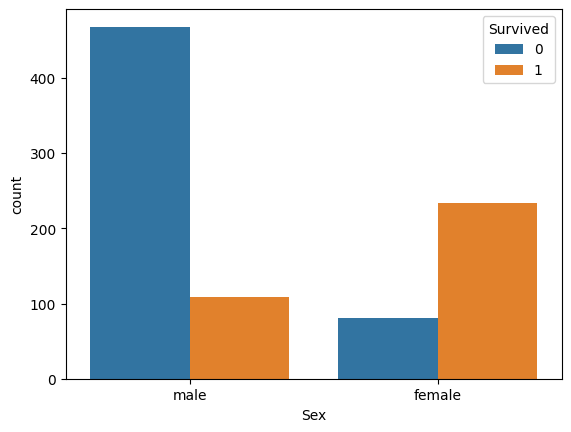

In [8]:
sns.countplot(x = "Sex", data = train_data, hue= "Survived")
plt.savefig('Sex, Survived.png')

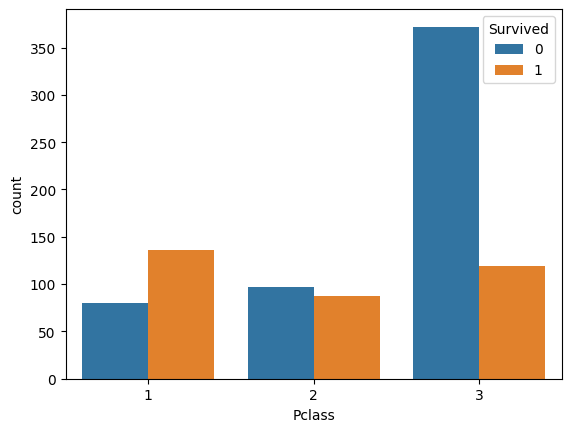

In [9]:
sns.countplot(x= "Pclass", data = train_data, hue= "Survived")
plt.savefig('./Pclass, Survived.png')

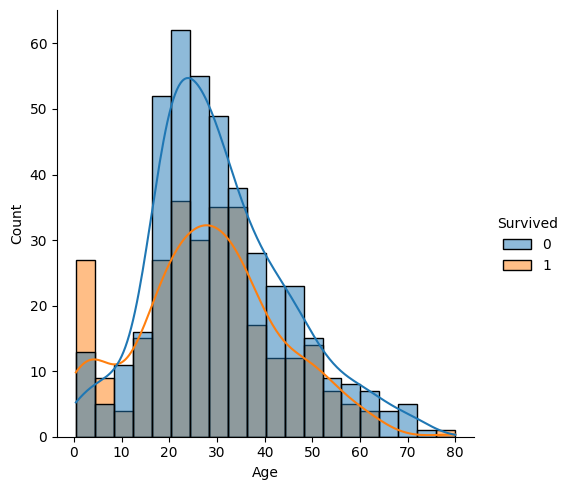

In [10]:
sns.displot(x= "Age", data = train_data, kde = True, hue= "Survived")
plt.savefig('./Age, Survive Dist.png')

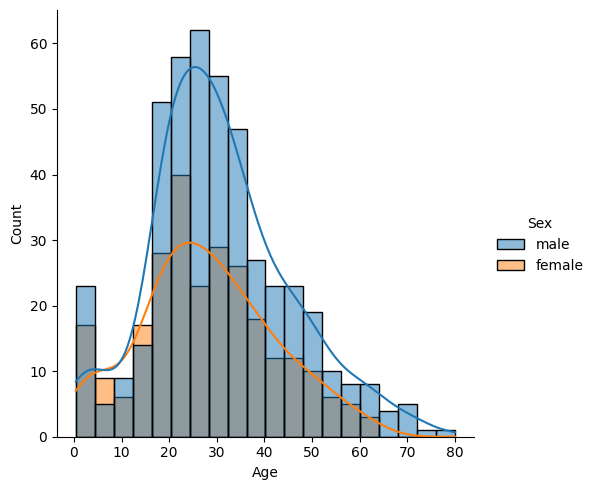

In [11]:
sns.displot(x= "Age", data = train_data, kde = True, hue= "Sex")
plt.savefig('Age, Sex dist.png')

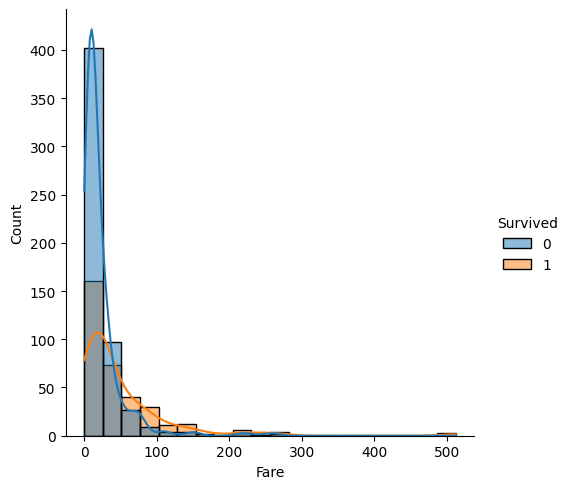

In [12]:
sns.displot(x= "Fare", data = train_data, kde = True, hue= "Survived", bins = 20)
plt.savefig('./Fare, Survival.png')

<Axes: xlabel='SibSp', ylabel='count'>

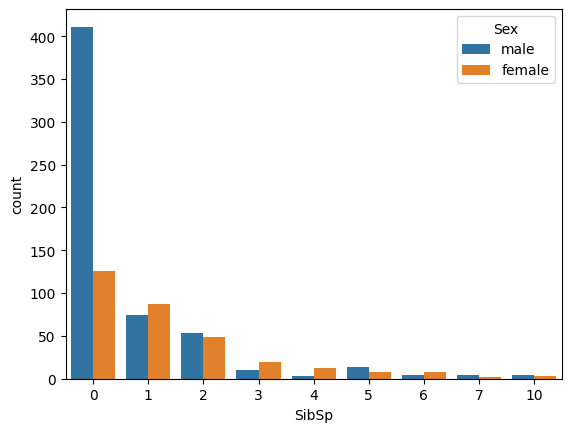

In [13]:
sns.countplot(x= "SibSp", data = train_data, hue= "Sex")

In [14]:
train_data["Sex"] = np.where(train_data["Sex"] == "male", 0, 1)

In [15]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.0,1,7.2500,S
1,1,1,1,38.0,1,71.2833,C
2,1,3,1,26.0,0,7.9250,S
3,1,1,1,35.0,1,53.1000,S
4,0,3,0,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,13.0000,S
887,1,1,1,19.0,0,30.0000,S
888,0,3,1,NaN,3,23.4500,S
889,1,1,0,26.0,0,30.0000,C


In [16]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
Embarked      2
dtype: int64

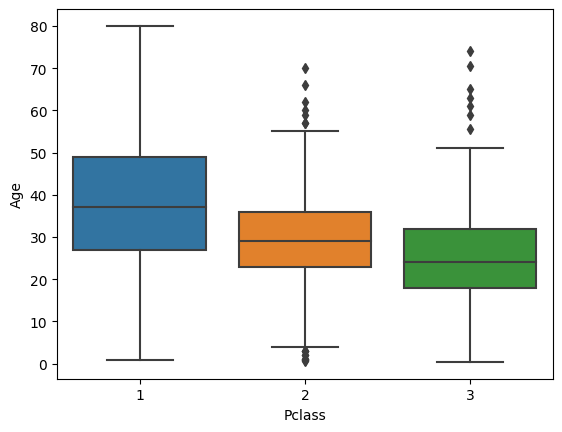

In [17]:
sns.boxplot(x = "Pclass", y = "Age", data = train_data)
plt.savefig('Pclass, Age boxplot.png')

In [18]:
class1 = train_data[train_data["Pclass"] == 1]["Age"].mean()
class2 = train_data[train_data["Pclass"] == 2]["Age"].mean()
class3 = train_data[train_data["Pclass"] == 3]["Age"].mean()

In [19]:
def fill_age(row):
    age = row[0]
    pclass = row[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return int(class1)
        elif pclass == 2:
            return int(class2)
        else:
            return int(class3)
    else:
        return age
    
train_data["Age"] = train_data[["Age", "Pclass"]].apply(fill_age, axis = 1)

In [20]:
Embarked = {
    'S':0,
    'C':1,
    'Q':2
}
train_data = train_data.dropna()

train_data['Embarked'] = [Embarked[i] for i in train_data['Embarked']]
train_data

/tmp/ipykernel_32389/2882697841.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Embarked'] = [Embarked[i] for i in train_data['Embarked']]


,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,22.0,1,7.2500,0
1,1,1,1,38.0,1,71.2833,1
2,1,3,1,26.0,0,7.9250,0
3,1,1,1,35.0,1,53.1000,0
4,0,3,0,35.0,0,8.0500,0
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,13.0000,0
887,1,1,1,19.0,0,30.0000,0
888,0,3,1,25.0,3,23.4500,0
889,1,1,0,26.0,0,30.0000,1


In [21]:
train_data['Embarked'].unique()

array([0, 1, 2])

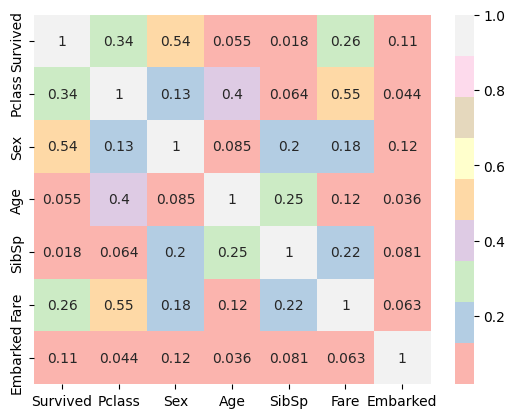

In [22]:
corr = abs(train_data.corr())
sns.heatmap(corr, cmap="Pastel1", annot = True)
plt.savefig('corr.png')

In [23]:
irrelevent_features = corr[corr < 0.2]['Survived'].dropna().index

train_data = train_data.drop(irrelevent_features, axis=1)

In [24]:
from sklearn.model_selection import train_test_split

x = train_data.drop(columns=["Survived"], axis=1)
y = train_data.drop(columns=train_data.columns[1:], axis=1)
y = np.array(y).reshape(y.size)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [26]:
from sklearn.linear_model import LogisticRegression
model0 = LogisticRegression()
model0.fit(x_train, y_train)

model0.score(x_test, y_test), model0.score(x_train, y_train)

(0.7752808988764045, 0.7834036568213784)

In [27]:
from sklearn.naive_bayes import CategoricalNB
model1 = CategoricalNB()
model1.fit(x_train, y_train)

model1.score(x_test, y_test), model1.score(x_train, y_train)

(0.7696629213483146, 0.8129395218002813)

In [28]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)

model2.score(x_test, y_test), model2.score(x_train, y_train)

(0.8146067415730337, 0.9057665260196905)

In [29]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

model3.score(x_test, y_test), model3.score(x_train, y_train)

(0.8202247191011236, 0.9057665260196905)

In [30]:
from sklearn.svm import SVC
model4 = SVC(kernel='linear')
model4.fit(x_train, y_train)

model4.score(x_test, y_test), model4.score(x_train, y_train)

(0.7865168539325843, 0.7862165963431786)

In [31]:
from sklearn.svm import SVC
model5 = SVC(kernel='rbf')
model5.fit(x_train, y_train)

model5.score(x_test, y_test), model5.score(x_train, y_train)

(0.6123595505617978, 0.6821378340365682)

In [32]:
test_data = pd.read_csv("./test.csv")
test_data
ids = test_data["PassengerId"]
ids = pd.DataFrame(ids)

In [33]:
test_data["SibSp"] = test_data["SibSp"] + test_data["Parch"]
test_data = test_data.drop(["PassengerId", "Name", "Ticket", "Cabin", "Parch"], axis=1)
test_data

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,34.5,0,7.8292,Q
1,3,female,47.0,1,7.0000,S
2,2,male,62.0,0,9.6875,Q
3,3,male,27.0,0,8.6625,S
4,3,female,22.0,2,12.2875,S
...,...,...,...,...,...,...
413,3,male,NaN,0,8.0500,S
414,1,female,39.0,0,108.9000,C
415,3,male,38.5,0,7.2500,S
416,3,male,NaN,0,8.0500,S


In [34]:
test_data["Sex"] = np.where(test_data["Sex"] == "male", 0, 1)

In [35]:
test_data["Age"] = test_data[["Age", "Pclass"]].apply(fill_age, axis = 1)
test_data

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,0,34.5,0,7.8292,Q
1,3,1,47.0,1,7.0000,S
2,2,0,62.0,0,9.6875,Q
3,3,0,27.0,0,8.6625,S
4,3,1,22.0,2,12.2875,S
...,...,...,...,...,...,...
413,3,0,25.0,0,8.0500,S
414,1,1,39.0,0,108.9000,C
415,3,0,38.5,0,7.2500,S
416,3,0,25.0,0,8.0500,S


In [36]:
fare1 = train_data[train_data["Pclass"] == 1]["Fare"].mean()
fare2 = train_data[train_data["Pclass"] == 2]["Fare"].mean()
fare3 = train_data[train_data["Pclass"] == 3]["Fare"].mean()

In [37]:
def fill_Fare(row):
    Fare = row[0]
    pclass = row[1]
    
    if pd.isnull(Fare):
        if pclass == 1:
            return fare1
        elif pclass == 2:
            return fare2
        else:
            return fare3
    else:
        return Fare
    
test_data["Fare"] = test_data[["Fare", "Pclass"]].apply(fill_Fare, axis = 1)


In [38]:
test_data = test_data.drop(irrelevent_features, axis=1)

In [39]:
y_test = model2.predict(test_data)

In [40]:
y_test = pd.DataFrame(y_test)

In [41]:
ids["Survived"] = y_test

In [42]:
ids

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
ids.to_csv('./predictions.csv', index=False)